In [11]:
import math
import numpy as np
import matplotlib.pyplot as plt
from Lib1 import *

# Q1 Fixed point

In [12]:
x0 = -math.log(2) / 2
root, n = fixed_point_iteration(x0)
print(f"The approximate root is {root:.4f}")
print("Number of iterations are", n)

The approximate root is 0.5672
Number of iterations are 18


# Q2 Simpson and Gaussian quadrature

In [13]:
def func( x ):
    return np.sqrt(1 + x**4)

lower_limit = 0   # Lower limit
upper_limit = 1 # Upper limit
n = 10 # Number of interval
print(" Simpson : %.6f"% simpsons_(func, lower_limit, upper_limit, n))

n = 6
integral_quad = gaussian_quadrature(func, lower_limit, upper_limit, n)
print(f" Gaussian Quadrature Result: {integral_quad:.6f}")

 Simpson : 1.089429
 Gaussian Quadrature Result: 1.089429


# Q3 RK4

In [14]:
# Given initial conditions
initial_x = 0
initial_y = 1.0

# Specify interval sizes
interval_sizes = [0.5, 0.2, 0.05, 0.01]

# Number of steps for each interval size
num_steps = [int(2 / h) for h in interval_sizes]

for h, steps in zip(interval_sizes, num_steps):
    solution = solve_ode_rk4(initial_x, initial_y, h, steps)
    print(f"Interval size (h = {h}):")
    for x, y in solution:
        print(f"x = {x:.4f}, y = {y:.4f}")

Interval size (h = 0.5):
x = 0.0000, y = 1.0000
x = 0.5000, y = 0.9132
x = 1.0000, y = 1.0719
x = 1.5000, y = 1.3498
x = 2.0000, y = 1.6191
Interval size (h = 0.2):
x = 0.0000, y = 1.0000
x = 0.2000, y = 0.9378
x = 0.4000, y = 0.9104
x = 0.6000, y = 0.9267
x = 0.8000, y = 0.9838
x = 1.0000, y = 1.0716
x = 1.2000, y = 1.1778
x = 1.4000, y = 1.2920
x = 1.6000, y = 1.4064
x = 1.8000, y = 1.5162
x = 2.0000, y = 1.6189
Interval size (h = 0.05):
x = 0.0000, y = 1.0000
x = 0.0500, y = 0.9821
x = 0.1000, y = 0.9656
x = 0.1500, y = 0.9507
x = 0.2000, y = 0.9378
x = 0.2500, y = 0.9271
x = 0.3000, y = 0.9189
x = 0.3500, y = 0.9133
x = 0.4000, y = 0.9104
x = 0.4500, y = 0.9104
x = 0.5000, y = 0.9131
x = 0.5500, y = 0.9185
x = 0.6000, y = 0.9267
x = 0.6500, y = 0.9375
x = 0.7000, y = 0.9507
x = 0.7500, y = 0.9662
x = 0.8000, y = 0.9838
x = 0.8500, y = 1.0034
x = 0.9000, y = 1.0246
x = 0.9500, y = 1.0474
x = 1.0000, y = 1.0716
x = 1.0500, y = 1.0969
x = 1.1000, y = 1.1231
x = 1.1500, y = 1.1502
x = 

# Q4 Heat equation

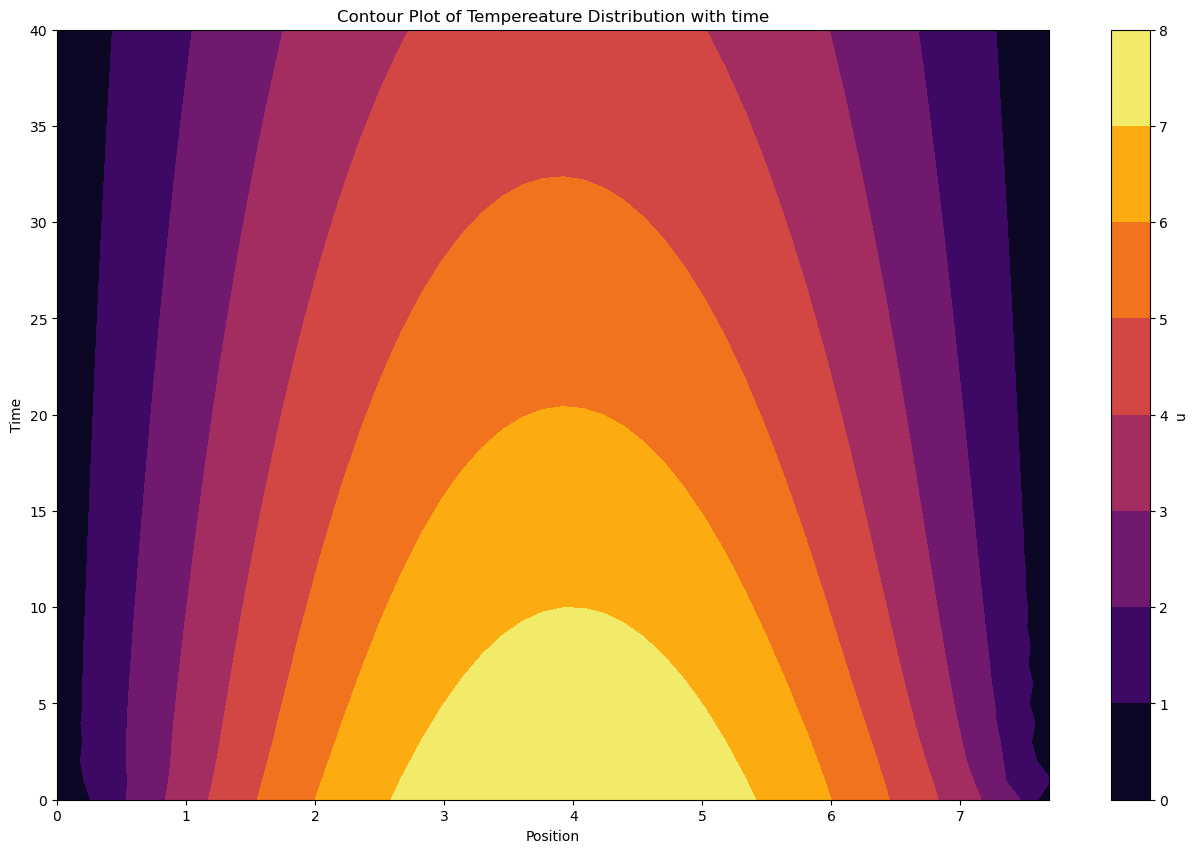

In [17]:
def func(x):
    return (4*x) - (x**2)/2


ans = crank_nicolson(func,8,50,4,0.1)

ulist,x=ans
num_times = len(ulist)
num_x_values = len(x)

X, Y = np.meshgrid(x, range(num_times))
u_values = np.array(ulist)
plt.figure(figsize=(16, 10))
contour = plt.contourf(X, Y, u_values, cmap='inferno')
plt.colorbar(contour, label='u')
plt.xlabel('Position')
plt.ylabel('Time')
plt.title('Contour Plot of Tempereature Distribution with time')
plt.show()

# Poission's equation

U(X,Y): 
 [[ 0.          0.          0.          0.          0.          0.        ]
 [ 0.4         0.0761308  -0.02870569 -0.07878401  0.1566554   1.08731273]
 [ 0.8         0.18342405 -0.03253772 -0.1346564   0.4067215   2.17462546]
 [ 1.2         0.29273414 -0.04119464 -0.20332837  0.65384535  3.26193819]
 [ 1.6         1.13984737  1.22893661  1.67871496  3.82997495  4.34925093]
 [ 2.          2.9836494   4.45108186  6.64023385  9.90606485  5.43656366]]


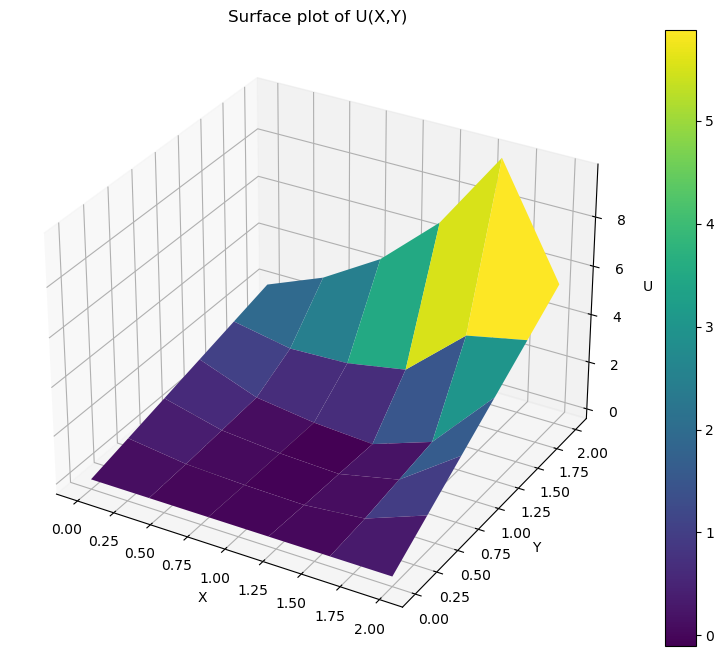

In [19]:
grid_n = 6
x = np.linspace(0, 2, grid_n)
y = np.linspace(0, 2, grid_n)
dx = x[1] - x[0]
dy = y[1] - y[0]

# Initialize the solution array
U = np.zeros((grid_n, grid_n))

# Set the boundary conditions
U[0, :] = 0  # u(0, y) = 0
U[-1, :] = 2 * np.exp(y)  # u(2, y) = 2e^y
U[:, 0] = x  # u(x, 0) = x
U[:, -1] = x * np.exp(1)  # u(x, 1) = xe

# Define the RHS function
X, Y = np.meshgrid(x, y)
f = X * np.exp(Y)

# Solve the Poisson's equation
for i in range(1, grid_n-1):
	for j in range(1, grid_n-1):
		U[i, j] = ((U[i+1, j] + U[i-1, j]) / dx**2 + (U[i, j+1] + U[i, j-1]) / dy**2 - f[i, j]) / (2/dx**2 + 2/dy**2)


print('U(X,Y): \n',U)

# Create a meshgrid for x and y
X, Y = np.meshgrid(x, y)

# Create the figure and axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, U, cmap='viridis')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('U')
ax.set_title('Surface plot of U(X,Y)')

# Add a color bar
fig.colorbar(surf)

# Show the plot
plt.show()